# NBA Draft Position Study

In [1]:
# Dependencies and Setup
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import matplotlib.colors as mcolors

In [2]:
# Pull NBA draft CSV
draft_path = Path("Resources/cleaned_draft_data.csv")
draft_data = pd.read_csv(draft_path)
draft_data.head()

,_id,Name,Month,Day,Year,Position,College,Draft Year,Draft Round,Draft Pick,Career Games Played,Career Points Per Game,Total Career Points,Birth City,Birth State/Country
0,abdelal01,Alaa Abdelnaby,June,24,1968,Power Forward,Duke University,1990,1st round,25th overall,256,5.7,1459,Cairo,Egypt
1,abdulma02,Mahmoud Abdul-Rauf,March,9,1969,Point Guard,Louisiana State University,1990,1st round,3rd overall,586,14.6,8555,Gulfport,Mississippi
2,abdulta01,Tariq Abdul-Wahad,November,3,1974,Shooting Guard,"University of Michigan, San Jose State University",1997,1st round,11th overall,236,7.8,1840,Maisons Alfort,France
3,abdursh01,Shareef Abdur-Rahim,December,11,1976,Center and Small Forward and Power Forward,University of California,1996,1st round,3rd overall,830,18.1,15023,Marietta,Georgia
4,abrinal01,Alex Abrines,August,1,1993,Shooting Guard,No college,2013,2nd round,32nd overall,174,5.3,922,Palma de Mallorca,Spain


In [3]:
# Pull NBA salary CSV
salaries_path = Path("Resources/cleaned_salary_data.csv")
salaries = pd.read_csv(salaries_path)
salaries.head()

,_id,Total Earnings,Inflation-Adjusted Earnings
0,abdelal01,2844000,6.304225e+06
1,abdulka01,8560000,2.406022e+07
2,abdulma02,19849500,4.177226e+07
3,abdulta01,37982800,6.558494e+07
4,abdursh01,95866000,1.630366e+08


In [4]:
# Merge data
full_data = pd.merge(draft_data, salaries, on="_id")

In [5]:
# Convert the 'Draft Pick' column to only include the numeric values
full_data['Draft Number'] = full_data['Draft Pick'].str.extract('(\d+)').astype(float)

In [6]:
full_data.head()

,_id,Name,Month,Day,Year,Position,College,Draft Year,Draft Round,Draft Pick,Career Games Played,Career Points Per Game,Total Career Points,Birth City,Birth State/Country,Total Earnings,Inflation-Adjusted Earnings,Draft Number
0,abdelal01,Alaa Abdelnaby,June,24,1968,Power Forward,Duke University,1990,1st round,25th overall,256,5.7,1459,Cairo,Egypt,2844000,6.304225e+06,25.0
1,abdulma02,Mahmoud Abdul-Rauf,March,9,1969,Point Guard,Louisiana State University,1990,1st round,3rd overall,586,14.6,8555,Gulfport,Mississippi,19849500,4.177226e+07,3.0
2,abdulta01,Tariq Abdul-Wahad,November,3,1974,Shooting Guard,"University of Michigan, San Jose State University",1997,1st round,11th overall,236,7.8,1840,Maisons Alfort,France,37982800,6.558494e+07,11.0
3,abdursh01,Shareef Abdur-Rahim,December,11,1976,Center and Small Forward and Power Forward,University of California,1996,1st round,3rd overall,830,18.1,15023,Marietta,Georgia,95866000,1.630366e+08,3.0
4,abrinal01,Alex Abrines,August,1,1993,Shooting Guard,No college,2013,2nd round,32nd overall,174,5.3,922,Palma de Mallorca,Spain,11719764,1.504430e+07,32.0


In [7]:
# Print total number of rows
full_data.count()

_id                            1535
Name                           1535
Month                          1535
Day                            1535
Year                           1535
Position                       1535
College                        1535
Draft Year                     1535
Draft Round                    1535
Draft Pick                     1535
Career Games Played            1535
Career Points Per Game         1535
Total Career Points            1535
Birth City                     1535
Birth State/Country            1532
Total Earnings                 1535
Inflation-Adjusted Earnings    1535
Draft Number                   1535
dtype: int64

## Which draft position produces the highest average career earnings?

In [8]:
# Group data by draft position and sort by highest average career earnings
draft_pick_data = full_data.groupby(["Draft Number", "Draft Pick"])
draft_earnings = draft_pick_data["Total Earnings"].mean()
draft_earnings = draft_earnings.reset_index("Draft Number", drop=True)

sorted_draft_earnings = draft_earnings.sort_values(ascending=False)
display(draft_earnings.head())

Draft Pick
1st overall    9.717674e+07
2nd overall    7.384961e+07
3rd overall    7.455684e+07
4th overall    6.971601e+07
5th overall    7.123789e+07
Name: Total Earnings, dtype: float64

In [9]:
# Find the draft position with the highest average career earnings
highest_value = "${:,.2f}".format(sorted_draft_earnings.iloc[0])
print(f"The draft position that produces the highest average earnings is: {sorted_draft_earnings.index[0]} with a total of {highest_value}")

The draft position that produces the highest average earnings is: 1st overall with a total of $97,176,741.09


## Which draft position produces the highest average career earnings adjusted to Sep. 1st 2023 inflation?

In [10]:
# Repeating for inflaion-adjusted earnings
draft_earnings_adjusted = draft_pick_data["Inflation-Adjusted Earnings"].mean()
draft_earnings_adjusted = draft_earnings_adjusted.reset_index("Draft Number", drop=True)
sorted_draft_earnings_adjusted = draft_earnings_adjusted.sort_values(ascending=False)
#display(draft_earnings_adjusted.head())

# Find the draft position with the highest average career earnings adjusted to Sep. 1st 2023 inflation
highest_value = "${:,.2f}".format(sorted_draft_earnings_adjusted.iloc[0])
print(f"The draft position that produces the highest average inflation-adjusted earnings is: {sorted_draft_earnings_adjusted.index[0]} with a total of {highest_value}")

The draft position that produces the highest average inflation-adjusted earnings is: 1st overall with a total of $152,115,203.00


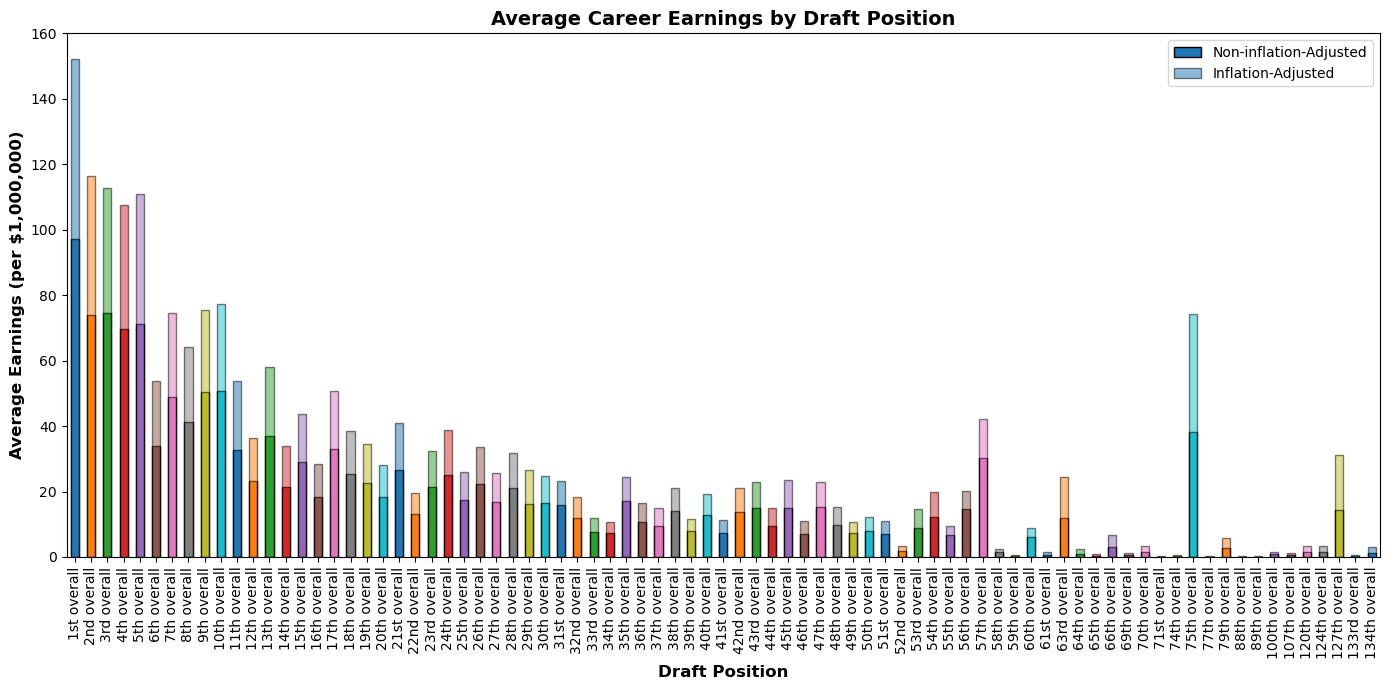

In [11]:
#Average Career Earnings by Draft Position (Non-inflation-Adjusted vs Inflation-Adjusted)
plt.figure(figsize=(14, 7))
draft_earnings.plot(kind='bar', color=mcolors.TABLEAU_COLORS, edgecolor='black')
draft_earnings_adjusted.plot(kind='bar', color=mcolors.TABLEAU_COLORS, edgecolor='black', alpha=0.5)
plt.title('Average Career Earnings by Draft Position', size=14, weight='bold')
plt.xlabel('Draft Position', size=12, weight='bold')
plt.xticks(rotation=90)
plt.ylabel('Average Earnings (per $1,000,000)', size=12, weight='bold')

ylocs, ylabels = plt.yticks()
ylabels = [int(float(label.get_text()) * 100) for label in ylabels]
plt.yticks(ylocs, labels=ylabels)
plt.legend(labels = ["Non-inflation-Adjusted", "Inflation-Adjusted"])
plt.tight_layout()
plt.savefig("Resources/draft_position_earnings.png")
plt.show()

## Compare average career earnings of different round picks

In [12]:
# Group data by draft rounds and find the average career earnings
round_earnings = full_data.groupby("Draft Round")["Total Earnings"].mean()
display(round_earnings)

Draft Round
1st round    3.682607e+07
2nd round    1.113917e+07
3rd round    4.266847e+06
4th round    6.946208e+06
5th round    6.161250e+05
6th round    3.822300e+06
Name: Total Earnings, dtype: float64

In [13]:
# Find the draft round with the highest average career earnings
sorted_round_earnings = round_earnings.sort_values(ascending=False)
highest_value = "${:,.2f}".format(sorted_round_earnings.iloc[0])
print(f"The draft round that produces the highest average earnings is: {sorted_round_earnings.index[0]} with a total of {highest_value}")

The draft round that produces the highest average earnings is: 1st round with a total of $36,826,065.39


## Compare average career earnings of different round picks adjusted to Sep. 1st 2023 inflation

In [14]:
# Repeating for inflaion-adjusted earnings
round_earnings_adjusted = full_data.groupby("Draft Round")["Inflation-Adjusted Earnings"].mean()
sorted_round_earnings_adjusted = round_earnings_adjusted.sort_values(ascending=False)
#display(round_earnings_adjusted)

# Find the draft round with the highest average career earnings adjusted to Sep. 1st 2023 inflation
highest_value = "${:,.2f}".format(sorted_round_earnings_adjusted.iloc[0])
print(f"The draft round that produces the highest average inflation-adjusted earnings is: {sorted_round_earnings_adjusted.index[0]} with a total of {highest_value}")

The draft round that produces the highest average inflation-adjusted earnings is: 1st round with a total of $56,720,447.36


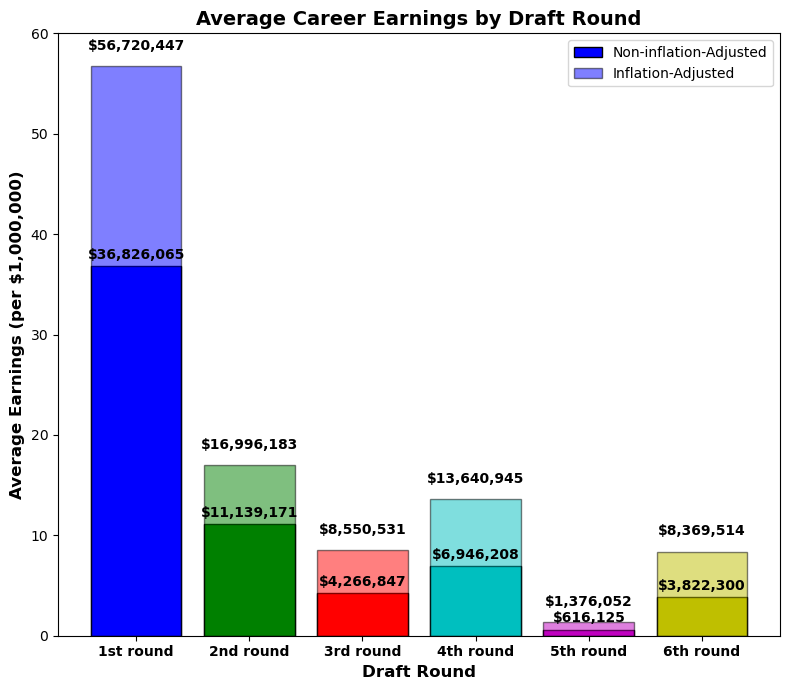

In [15]:
#Average Career Earnings by Draft Round (Non-inflation-Adjusted vs Inflation-Adjusted)
fig, ax = plt.subplots(figsize=(8, 7))
bar_container = ax.bar(round_earnings.index, round_earnings, color=mcolors.BASE_COLORS, edgecolor='black')
ax.bar_label(bar_container, fmt='${:,.0f}', weight='bold', padding=3)
bar_container2 = ax.bar(round_earnings_adjusted.index, round_earnings_adjusted, color=mcolors.BASE_COLORS, edgecolor='black', alpha=0.5)
ax.bar_label(bar_container2, fmt='${:,.0f}', weight='bold', padding=9.5)

plt.title('Average Career Earnings by Draft Round', size=14, weight='bold')
plt.xlabel('Draft Round', size=12, weight='bold')
plt.ylabel('Average Earnings (per $1,000,000)', size=12, weight='bold')

ylocs, ylabels = plt.yticks()
ylabels = [int(float(label.get_text()) * 10) for label in ylabels]
plt.yticks(ylocs, labels=ylabels)
plt.xticks(rotation=0, weight='bold')
plt.legend(labels = ["Non-inflation-Adjusted", "Inflation-Adjusted"])
plt.tight_layout()
plt.savefig("Resources/draft_round_earnings.png")
plt.show()

## Which draft year produces the highest average career earnings?

In [16]:
# Group data by draft year and sort by highest average career earnings
draft_year_data = full_data.groupby("Draft Year")
draft_year_earnings = draft_year_data['Total Earnings'].mean()
highest_draft_year_earnings = draft_year_earnings.sort_values(ascending=False)
highest_draft_year_earnings.head()

Draft Year
1996    4.991753e+07
2003    4.749541e+07
2001    4.710546e+07
2008    4.106275e+07
1999    4.076935e+07
Name: Total Earnings, dtype: float64

In [17]:
# Find the draft year with the highest average career earnings
highest_value = "${:,.2f}".format(highest_draft_year_earnings.iloc[0])
print(f"The draft year that produces the highest average earnings is: {highest_draft_year_earnings.index[0]} with a total of {highest_value}")

The draft year that produces the highest average earnings is: 1996 with a total of $49,917,527.09


## Which draft year produces the highest average career earnings adjusted to Sep. 1st 2023 inflation?

In [18]:
# Group data by draft year and sort by highest average career earnings adjusted to Sep. 1st 2023 inflation
draft_year_earnings_adjusted = draft_year_data['Inflation-Adjusted Earnings'].mean()
highest_draft_year_earnings_adjusted = draft_year_earnings_adjusted.sort_values(ascending=False)
#display(highest_draft_year_earnings_adjusted.head())

# Find the draft year with the highest average career earnings adjusted to Sep. 1st 2023 inflation
highest_value = "${:,.2f}".format(highest_draft_year_earnings_adjusted.iloc[0])
print(f"The draft year that produces the highest adjusted average inflation-adjusted earnings is: {highest_draft_year_earnings_adjusted.index[0]} with a total of {highest_value}")

The draft year that produces the highest adjusted average inflation-adjusted earnings is: 1996 with a total of $80,967,181.07


In [19]:
# Create a helper function to convert "−" into "-" to avoid float-conversion issue
def convert(num):
    if num[0] == "−":
        result = num.replace("−", "-")
    else:
        result = num
    return result

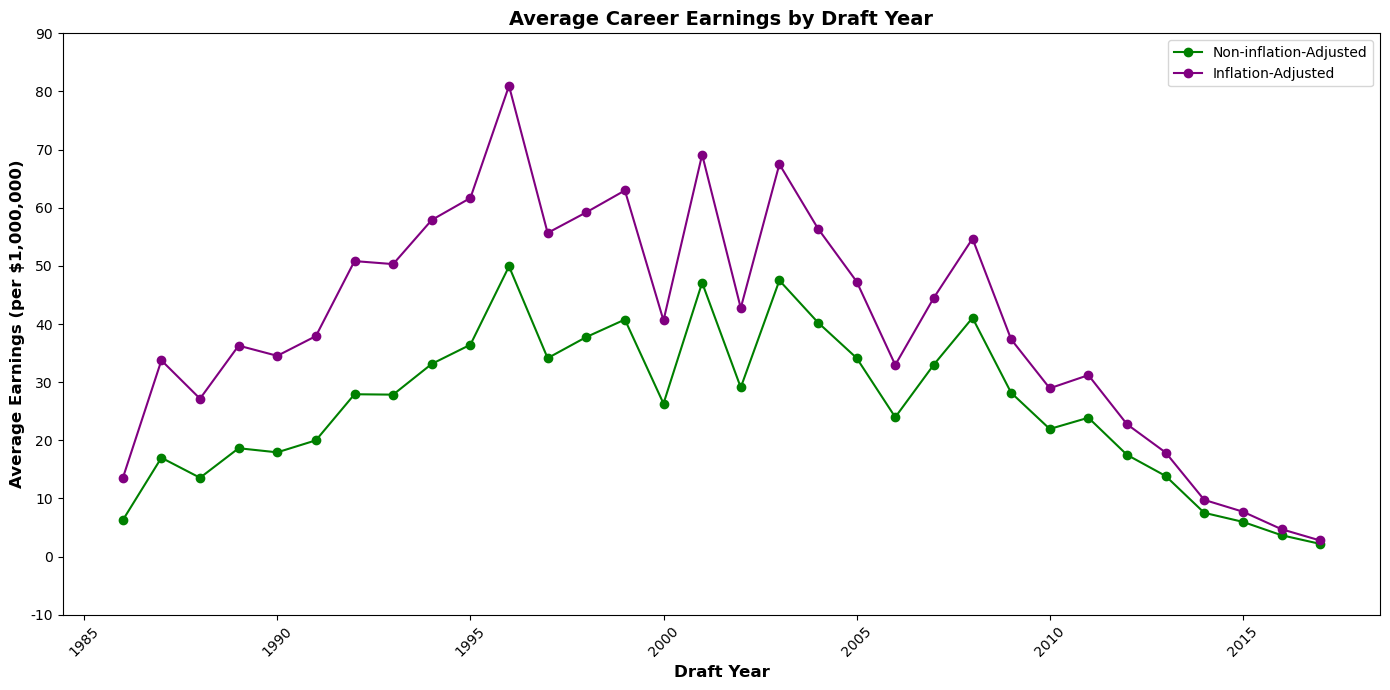

In [20]:
#Average Career Earnings by Draft Year (Non-inflation-Adjusted vs Inflation-Adjusted)
plt.figure(figsize=(14, 7))
draft_year_earnings.plot(kind='line', marker='o', color='green')
draft_year_earnings_adjusted.plot(kind='line', marker='o', color='purple')
plt.title('Average Career Earnings by Draft Year', size=14, weight='bold')
plt.xlabel('Draft Year', size=12, weight='bold')
plt.ylabel('Average Earnings (per $1,000,000)', size=12, weight='bold')

ylocs, ylabels = plt.yticks()
ylabels = [int(float(convert(label.get_text())) * 10) for label in ylabels]
plt.yticks(ylocs, labels=ylabels)
plt.xticks(rotation=45)
plt.legend(labels = ["Non-inflation-Adjusted", "Inflation-Adjusted"])
plt.tight_layout()
plt.savefig("Resources/draft_year_earnings.png")
plt.show()

## Relationship between Draft Pick Position and Inflation-Adjusted Earnings
To check if there is a clear trend between being picked earlier in the draft and having a higher salary

The correlation between draft pick position and Inflation-Adjusted earnings is -0.41


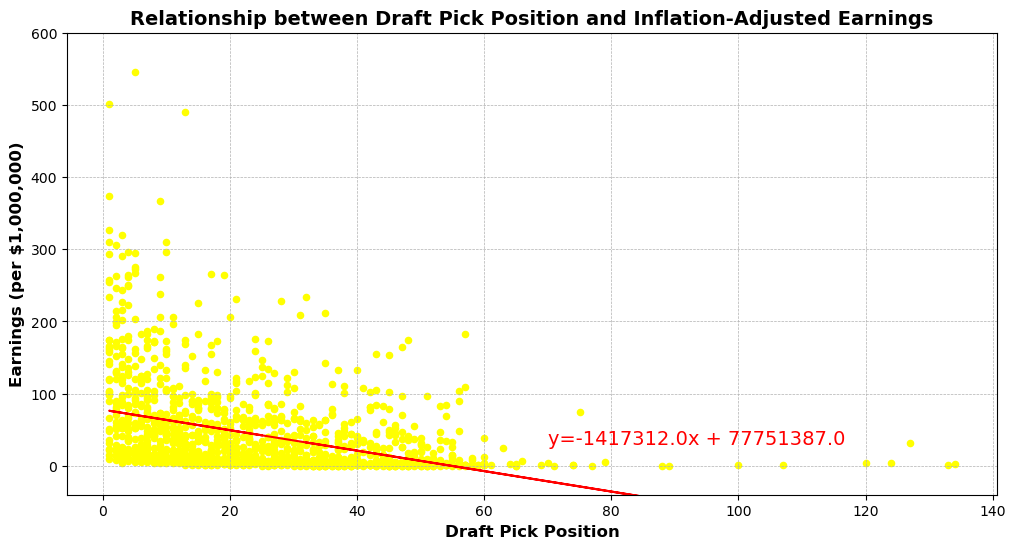

In [21]:
# Create a scatter plot to find relationship between Draft Pick Position and Inflation-Adjusted Earnings
full_data.plot.scatter('Draft Number', 'Inflation-Adjusted Earnings', color='yellow', figsize=(12, 6))
plt.title('Relationship between Draft Pick Position and Inflation-Adjusted Earnings', size=14, weight='bold')
plt.xlabel('Draft Pick Position', size=12, weight='bold')
plt.ylabel('Earnings (per $1,000,000)', size=12, weight='bold')

slope, intercept, rvalue, pvalue, stderr = linregress(full_data["Draft Number"], full_data["Inflation-Adjusted Earnings"])
regress_values = full_data["Draft Number"] * slope + intercept
plt.plot(full_data["Draft Number"], regress_values, color='red')
plt.annotate(f"y={round(slope, 0)}x + {round(intercept, 0)}", xy=(70, 30000000), color='red', size=14)

ylocs, ylabels = plt.yticks()
ylabels = [int(float(convert(label.get_text())) * 100) for label in ylabels]
plt.yticks(ylocs, labels=ylabels)
plt.ylim(-40000000, 600000000)
print(f"The correlation between draft pick position and Inflation-Adjusted earnings is {round(rvalue, 2)}")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig("Resources/draft_position_earnings2.png")
plt.show()

## Relationship between Draft Year and Inflation-Adjusted Earnings

The correlation between draft year and Inflation-Adjusted earnings is -0.13


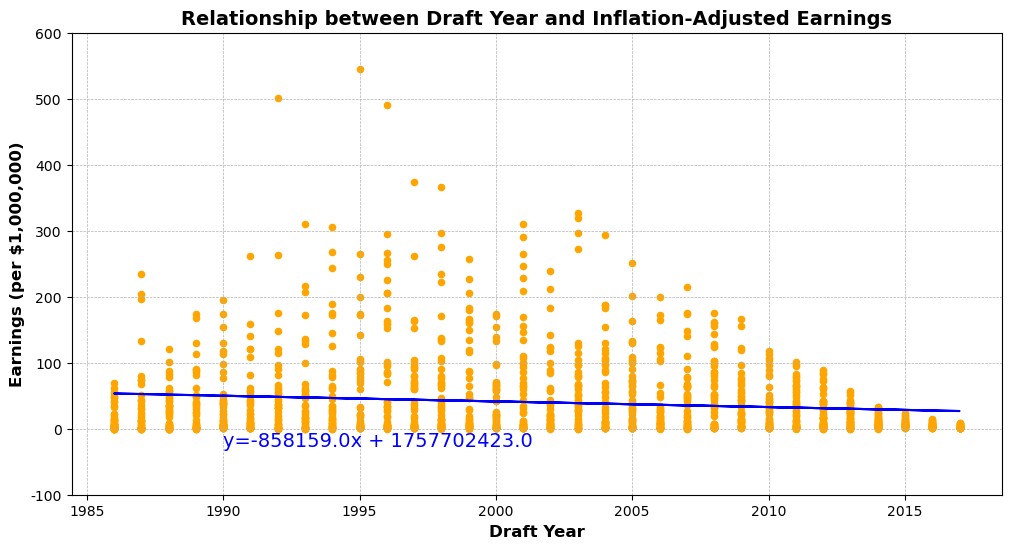

In [22]:
# Create a scatter plot to find relationship between Draft Year and Inflation-Adjusted Earnings
full_data.plot.scatter('Draft Year', 'Inflation-Adjusted Earnings', color='orange', figsize=(12, 6))
plt.title('Relationship between Draft Year and Inflation-Adjusted Earnings', size=14, weight='bold')
plt.xlabel('Draft Year', size=12, weight='bold')
plt.ylabel('Earnings (per $1,000,000)', size=12, weight='bold')

slope, intercept, rvalue, pvalue, stderr = linregress(full_data["Draft Year"], full_data["Inflation-Adjusted Earnings"])
regress_values = full_data["Draft Year"] * slope + intercept
plt.plot(full_data["Draft Year"], regress_values, color='blue')
plt.annotate(f"y={round(slope, 0)}x + {round(intercept, 0)}", xy=(1990, -27000000), color='blue', size=14)

ylocs, ylabels = plt.yticks()
ylabels = [int(float(convert(label.get_text())) * 100) for label in ylabels]
plt.yticks(ylocs, labels=ylabels)
print(f"The correlation between draft year and Inflation-Adjusted earnings is {round(rvalue, 2)}")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig("Resources/draft_year_earnings2.png")
plt.show()

In [23]:
# Created a new column that displays the age at which the player was drafted in the NBA
full_data['Age Drafted'] = full_data['Draft Year'] - full_data['Year']

In [24]:
display(full_data.head())

,_id,Name,Month,Day,Year,Position,College,Draft Year,Draft Round,Draft Pick,Career Games Played,Career Points Per Game,Total Career Points,Birth City,Birth State/Country,Total Earnings,Inflation-Adjusted Earnings,Draft Number,Age Drafted
0,abdelal01,Alaa Abdelnaby,June,24,1968,Power Forward,Duke University,1990,1st round,25th overall,256,5.7,1459,Cairo,Egypt,2844000,6.304225e+06,25.0,22
1,abdulma02,Mahmoud Abdul-Rauf,March,9,1969,Point Guard,Louisiana State University,1990,1st round,3rd overall,586,14.6,8555,Gulfport,Mississippi,19849500,4.177226e+07,3.0,21
2,abdulta01,Tariq Abdul-Wahad,November,3,1974,Shooting Guard,"University of Michigan, San Jose State University",1997,1st round,11th overall,236,7.8,1840,Maisons Alfort,France,37982800,6.558494e+07,11.0,23
3,abdursh01,Shareef Abdur-Rahim,December,11,1976,Center and Small Forward and Power Forward,University of California,1996,1st round,3rd overall,830,18.1,15023,Marietta,Georgia,95866000,1.630366e+08,3.0,20
4,abrinal01,Alex Abrines,August,1,1993,Shooting Guard,No college,2013,2nd round,32nd overall,174,5.3,922,Palma de Mallorca,Spain,11719764,1.504430e+07,32.0,20


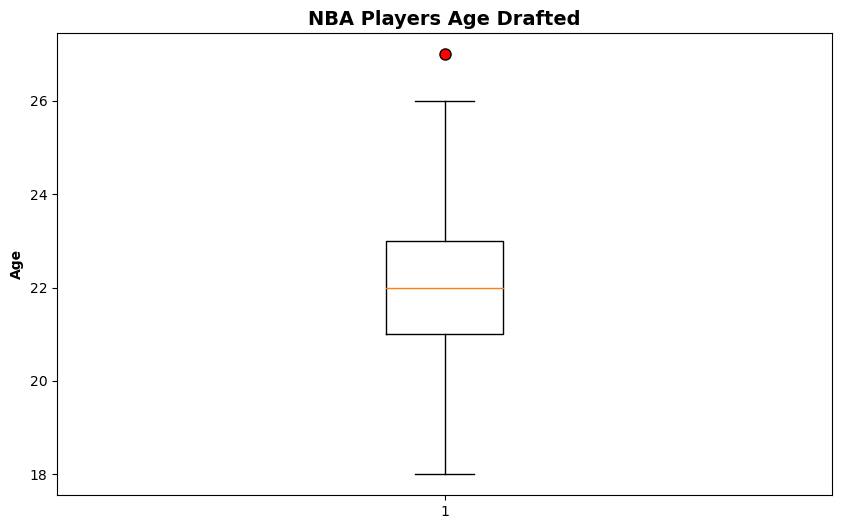

In [25]:
# Creating a box and whisker plot of the newly created "Age Drafted" column
plt.figure(figsize=(10, 6))
plt.boxplot(full_data['Age Drafted'], flierprops = dict(marker = "o", markerfacecolor = "red", markersize=8))
plt.title('NBA Players Age Drafted', size=14, weight="bold")
plt.ylabel('Age', weight="bold")
plt.savefig("Resources/age_drafted_outliers.png")
plt.show()


In [26]:
age_drafted_summary = full_data['Age Drafted'].describe()[['min', '25%', '50%', '75%', 'max']]
display(age_drafted_summary)

min    18.0
25%    21.0
50%    22.0
75%    23.0
max    27.0
Name: Age Drafted, dtype: float64